In [1]:
import pandas
import numpy
data = pandas.read_csv('autoMpg.csv')
data_for_normalization = pandas.read_csv('autoMpg.csv')

def fill_na_values(training_data):
    #copy data
    training_data_copy = training_data.copy()
    #calculate mean horsepower
    horsepower_mean = training_data_copy['horsepower'].mean()
    #fill na values with the mean
    training_data_copy['horsepower'] = training_data_copy['horsepower'].fillna(horsepower_mean)
    return training_data_copy

def classify_kNN(new_example, training_data, k):
    #getting a copy of the training set just so we don't 
    #mess up the original
    training_data_copy = fill_na_values(training_data)
    #add a new feature to the data frame
    # it is the euclidian distance based on cylinders, displacement, horsepower, and weight
    training_data_copy['distance_to_new'] = numpy.sqrt(
        (new_example['cylinders']-training_data_copy['cylinders'])**2
        +(new_example['displacement']-training_data_copy['displacement'])**2
        +(new_example['horsepower']-training_data_copy['horsepower'])**2
        +(new_example['weight']-training_data_copy['weight'])**2
        +(new_example['acceleration']-training_data_copy['acceleration'])**2
        +(new_example['model year']-training_data_copy['model year'])**2
        +(new_example['origin']-training_data_copy['origin'])**2)
    #sort the data by distance_to_new
    sorted_data =  training_data_copy.sort_values(['distance_to_new'])
    #mean to get the average of the mpgs
    return sorted_data.iloc[0:k]['mpg'].mean()

def normalize_data(training_data):
    #make a cpoy of the data
    training_data_copy = fill_na_values(training_data)
    
    features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration','model year', 'origin']
    for f in features:
        training_data_copy[f] = (training_data_copy[f]-training_data_copy[f].mean())/training_data_copy[f].std()

    return training_data_copy

def classify_all_kNN(test_data, training_data, k):
    #apply the classify_kNN function to each item in the test data with the training data
    #data and k passed as the other two arguments.  the result will be a series of the individual results
    return test_data.apply(classify_kNN, args=(training_data, k), axis=1)

#R-Squared accuracy
def accuracy(actual, predicted):
    #weight
    dif_sqr = (actual - predicted)**2
    ss_res = dif_sqr.sum()
    
    actual_avg = actual.mean()
    
    dif_from_mean_sqr = (actual - actual_avg)**2
    ss_tot = dif_from_mean_sqr.sum() 
    
    r_sqr = 1-(ss_res/ss_tot)
    return r_sqr

In [8]:
#shuffle the data - "sammpling" the full set in random order
shuffled_data = data.sample(frac=1)
shuffled_data_copy = shuffled_data.copy()
normal_shuffled_data = normalize_data(shuffled_data_copy)

#use the first 40 rows in the shuffled set as testing data
#train with the rest
test_data = shuffled_data.iloc[1:40]
training_data = shuffled_data.iloc[40:]

normal_test_data = normal_shuffled_data.iloc[1:40]
normal_training_data = normal_shuffled_data.iloc[40:]

predictions5NN = classify_all_kNN(test_data, training_data, 5)
#print(test_data['mpg'])
#print(predictions5NN)
print(accuracy(test_data['mpg'],predictions5NN))

normal_predictions5NN = classify_all_kNN(normal_test_data, normal_training_data, 5)
#print(normal_test_data['mpg'])
#print(normal_predictions5NN)
print(accuracy(normal_test_data['mpg'],normal_predictions5NN))

0.5954578982799192
0.8737749004006663


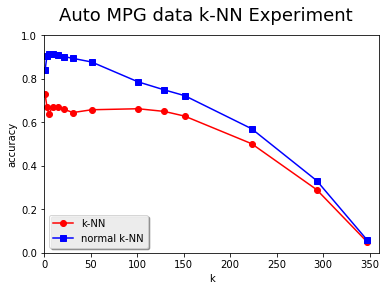

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

#reload the data
data = pandas.read_csv('autoMpg.csv')
data_for_normalization = pandas.read_csv('autoMpg.csv')

shuffled_data = data.sample(frac=1)
normal_shuffled_data = normalize_data(data_for_normalization).sample(frac=1)

test_data = shuffled_data.iloc[0:40]
training_data = shuffled_data.iloc[40:]
normal_test_data = normal_shuffled_data.iloc[0:40]
normal_training_data = normal_shuffled_data.iloc[40:]


k_vals = [1,3,5,9,15,21,31,51,101,129,151,223,293,347]
kNN_accuracies = []
normal_kNN_accuracies = []

for k in k_vals:
    predictions = classify_all_kNN(test_data,training_data,k)
    current_accuracy = accuracy(test_data['mpg'],predictions)
    kNN_accuracies.append(current_accuracy)
    
    normal_predictions = classify_all_kNN(normal_test_data,normal_training_data,k)
    normal_current_accuracy = accuracy(normal_test_data['mpg'],normal_predictions)
    normal_kNN_accuracies.append(normal_current_accuracy)

plt.suptitle('Auto MPG data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_vals,kNN_accuracies,'ro-',label='k-NN')
plt.plot(k_vals,normal_kNN_accuracies,'bs-',label='normal k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,360,0,1])

plt.show()